<a href="https://colab.research.google.com/github/rogerdemori/PosTech_Data_Analytics/blob/main/PNAD_Covid19_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install pyspark

In [41]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install basedosdados

In [42]:
import pandas as pd
import basedosdados as bd ## database management system for Bra# zilian public data
import numpy as np
import seaborn as sns
import os
from matplotlib import pyplot
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, FloatType, StringType
from pyspark.sql.functions import col, expr, concat, when, udf

spark = SparkSession.builder.appName("PNAD_Covic19").getOrCreate()
spark

In [43]:
# dict_basedosdados = bd.read_table(dataset_id='br_ibge_pnad_covid',
# table_id='dicionario',
# billing_project_id="basedosdados-1")

In [44]:
# base_df = bd.read_table(dataset_id='br_ibge_pnad_covid',
#   table_id='microdados',
#   billing_project_id="basedosdados-1") \
#           .fillna(0)

In [45]:
# base_df_sql = bd.read_sql(query="SELECT  * \
#                                   FROM `basedosdados.br_ibge_pnad_covid.microdados` cov_md \
#                                   WHERE cov_md.mes in (9,10,11)") \
#                                 .fillna(0)


In [46]:
# base_df_sql

In [47]:
# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [48]:
# covid_df = spark.createDataFrame(data = base_df_sql)

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [50]:
csv_path = '/content/gdrive/MyDrive/Colab Notebooks/Consolidado_Knime_PNAD_COVID.csv'

In [51]:
df = spark.read.csv(csv_path, inferSchema = True,header=True)

In [52]:
type(df)

pyspark.sql.dataframe.DataFrame

Selecting specific columns from data dictionary

In [53]:
df = df.select(['UF','Ano','V1013','V1022','A002','A003','B0011','B0012','B0013','B0014','B0015','B0018',
                'B0019','B00111','B002','B005','B006','B007','C001','C007D','C007E','C01011','C013','D0051'
           ])

In [54]:
df.show()

+---+----+-----+-----+----+----+-----+-----+-----+-----+-----+-----+-----+------+----+----+----+----+----+-----+-----+------+----+-----+
| UF| Ano|V1013|V1022|A002|A003|B0011|B0012|B0013|B0014|B0015|B0018|B0019|B00111|B002|B005|B006|B007|C001|C007D|C007E|C01011|C013|D0051|
+---+----+-----+-----+----+----+-----+-----+-----+-----+-----+-----+-----+------+----+----+----+----+----+-----+-----+------+----+-----+
| 11|2020|    9|    1|  36|   1|    2|    2|    2|    2|    2|    2|    2|     2|NULL|NULL|NULL|   1|   1|    6| NULL|     4|NULL|    1|
| 11|2020|    9|    1|  30|   2|    2|    2|    2|    2|    2|    2|    2|     2|NULL|NULL|NULL|   2|   1|   20| NULL|     4|NULL|    1|
| 11|2020|    9|    1|  13|   1|    2|    2|    2|    2|    2|    2|    2|     2|NULL|NULL|NULL|   1|NULL| NULL| NULL|  NULL|NULL|    1|
| 11|2020|    9|    1|  11|   1|    2|    2|    2|    2|    2|    2|    2|     2|NULL|NULL|NULL|   1|NULL| NULL| NULL|  NULL|NULL|    1|
| 11|2020|    9|    1|  57|   2|    2|   

## Altering data and column names

In [55]:
df

DataFrame[UF: int, Ano: int, V1013: int, V1022: int, A002: int, A003: int, B0011: int, B0012: int, B0013: int, B0014: int, B0015: int, B0018: int, B0019: int, B00111: int, B002: int, B005: int, B006: int, B007: int, C001: int, C007D: int, C007E: int, C01011: int, C013: int, D0051: int]

In [56]:
new_column_name_dict = {
    "UF": 'state_code',
    'Ano': 'year',
    'V1013': 'month',
    "V1022": "housing_status",
    "A002": "age",
    "A003": "sex",
    "B0011": "had_fever_last_week",
    "B0012": "had_cough_last_week",
    "B0013": "had_sore_throat_last_week",
    'B0014': "had_trouble_breathing_last_week",
    "B0015": "had_headache_last_week",
    "B0018": "had_runny_nose_last_week",
    "B0019": "had_lethargy_last_week",
    "B00111": "had_loss_of_smell_last_week",
    "B002": "went_to_healthcare_facility",
    "B005": "was_hospitalized",
    "B006": "used_ventilator",
    "B007": "has_health_insurance",
    "C001": "worked_last_week",
    "C007D": "main_job_activity",
    "C007E": "how_many_employees",
    "C01011": "income_range",
    "C013": "has_worked_remote",
    'D0051': "coronavirus_related_aid"
}

In [57]:
for old_col, new_col in new_column_name_dict.items():
    df = df.withColumnRenamed(old_col, new_col)

In [58]:
df.show()

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+-----------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------------

In [59]:
symptoms_dict = {
    1: "yes",
    2: "no",
    3: "dont_know",
    9: "ignored",
    0: "not_applicable"
}

In [60]:
# Columns to translate
symptoms_cols = ['had_fever_last_week','had_cough_last_week',
                 'had_sore_throat_last_week','had_headache_last_week','had_runny_nose_last_week',
                 'had_lethargy_last_week','had_loss_of_smell_last_week','went_to_healthcare_facility','was_hospitalized','has_health_insurance',
                 'worked_last_week','has_worked_remote','coronavirus_related_aid','used_ventilator','had_trouble_breathing_last_week']

work_cols = ['main_job_activity','how_many_employees','income_range']

In [61]:
brazil_states = {
    11: "RO",
    12: "AC",
    13: "AM",
    14: "RR",
    15: "PA",
    16: "AP",
    17: "TO",
    21: "MA",
    22: "PI",
    23: "CE",
    24: "RN",
    25: "PB",
    26: "PE",
    27: "AL",
    28: "SE",
    29: "BA",
    31: "MG",
    32: "ES",
    33: "RJ",
    35: "SP",
    41: "PR",
    42: "SC",
    43: "RS",
    50: "MS",
    51: "MT",
    52: "GO",
    53: "DF"
}

In [62]:

sector_translation = {
    1: "agriculture_livestock_forestry_and_fishing",
    2: "extraction_of_petroleum_coal_metallic_minerals_stone_sand_salt_etc",
    3: "manufacturing_industry_including_clothing_and_homemade_manufacturing",
    4: "supply_of_electricity_and_gas_water_sewerage_and_garbage_collection",
    5: "construction",
    6: "wholesale_and_retail_trade",
    7: "repair_of_motor_vehicles_and_motorcycles",
    8: "passenger_transport",
    9: "freight_transport",
    10: "storage_post_and_delivery_services",
    11: "accommodation_hotels_inns_etc",
    12: "food_service_bars_restaurants_food_vendors",
    13: "information_and_communication_newspapers_radio_and_television_telecommunications_and_it",
    14: "banks_financial_and_insurance_activities",
    15: "real_estate_activities",
    16: "law_firms_engineering_advertising_and_veterinary_services_professional_scientific_and_technical_activities",
    17: "labor_leasing_security_cleaning_landscaping_and_call_center_activities",
    18: "public_administration_federal_state_and_municipal_government",
    19: "education",
    20: "human_health_and_social_assistance",
    21: "religious_organizations_unions_and_associations",
    22: "artistic_sports_and_recreational_activities",
    23: "hairdressing_beauty_treatment_and_personal_services",
    24: "paid_domestic_service_to_be_reported_under_occupation",
    25: "other",
    0: "not_applicable"
}

In [63]:
employee_translation = {
    1: "1_to_5",
    2: "6_to_10",
    3: "11+",
    0: "not_applicable"
}

In [64]:
income_range = {
    0: "0-100",
    1: "101-300",
    2: "301-600",
    3: "601-800",
    4: "801-1,600",
    5: "1,601-3,000",
    6: "3,001-10,000",
    7: "10,001-50,000",
    8: "50,001-100,000",
    9: "100,000+",
    0: "not_applicable"
}

In [65]:
df.schema

StructType([StructField('state_code', IntegerType(), True), StructField('year', IntegerType(), True), StructField('month', IntegerType(), True), StructField('housing_status', IntegerType(), True), StructField('age', IntegerType(), True), StructField('sex', IntegerType(), True), StructField('had_fever_last_week', IntegerType(), True), StructField('had_cough_last_week', IntegerType(), True), StructField('had_sore_throat_last_week', IntegerType(), True), StructField('had_trouble_breathing_last_week', IntegerType(), True), StructField('had_headache_last_week', IntegerType(), True), StructField('had_runny_nose_last_week', IntegerType(), True), StructField('had_lethargy_last_week', IntegerType(), True), StructField('had_loss_of_smell_last_week', IntegerType(), True), StructField('went_to_healthcare_facility', IntegerType(), True), StructField('was_hospitalized', IntegerType(), True), StructField('used_ventilator', IntegerType(), True), StructField('has_health_insurance', IntegerType(), True)

In [66]:
df.show(5)

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+-----------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------------

In [67]:
#Viewing the dataframe schema
df.printSchema()

root
 |-- state_code: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- housing_status: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- had_fever_last_week: integer (nullable = true)
 |-- had_cough_last_week: integer (nullable = true)
 |-- had_sore_throat_last_week: integer (nullable = true)
 |-- had_trouble_breathing_last_week: integer (nullable = true)
 |-- had_headache_last_week: integer (nullable = true)
 |-- had_runny_nose_last_week: integer (nullable = true)
 |-- had_lethargy_last_week: integer (nullable = true)
 |-- had_loss_of_smell_last_week: integer (nullable = true)
 |-- went_to_healthcare_facility: integer (nullable = true)
 |-- was_hospitalized: integer (nullable = true)
 |-- used_ventilator: integer (nullable = true)
 |-- has_health_insurance: integer (nullable = true)
 |-- worked_last_week: integer (nullable = true)
 |-- main_job_activity: integer (nullable = tr

In [68]:
def translate_and_cast(value):
    return symptoms_dict.get(value, None)

translate_udf = udf(translate_and_cast, StringType())

# Apply the UDF to the selected columns
for column in symptoms_cols:
    df = df.withColumn(column, translate_udf(col(column)))

In [69]:
df.show()

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+-----------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------------

In [70]:
def translate_and_cast_state(value):
    return brazil_states.get(value, None)

translate_udf = udf(translate_and_cast_state, StringType())

# Apply the UDF to the selected columns
df = df.withColumn("state_code", col("state_code").cast(IntegerType()))
df = df.withColumn('state_code', translate_udf(col('state_code')))

In [71]:
df.show()

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+-----------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------------

In [72]:
def translate_and_cast_sector(value):
    return sector_translation.get(value, None)

translate_udf = udf(translate_and_cast_sector, StringType())

# Apply the UDF to the selected columns

df = df.withColumn('main_job_activity', translate_udf(col('main_job_activity')))

In [73]:
df.show()

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------

In [74]:
def translate_and_cast_n_of_employees(value):
    return employee_translation.get(value, None)

translate_udf = udf(translate_and_cast_sector, StringType())

# Apply the UDF to the selected columns

df = df.withColumn('how_many_employees', translate_udf(col('how_many_employees')))

In [75]:
df.show()

+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+---+-------------------+-------------------+-------------------------+------------

In [76]:
def translate_and_cast_income(value):
    return income_range.get(value, None)

translate_udf = udf(translate_and_cast_income, StringType())

# Apply the UDF to the selected columns

df = df.withColumn('income_range', translate_udf(col('income_range')))

In [77]:
df = df.withColumn("sex", F.expr("CASE WHEN sex == 1 THEN 'male' ELSE 'female' END"))
df = df.withColumn("housing_status", F.expr("CASE WHEN housing_status == 1 THEN 'urban' ELSE 'rural' END"))

In [78]:
df.show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+--------------+-----------------+-----------------------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|  income_range|has_worked_remote|coronavirus_related_aid|
+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------

In [79]:
df.count()

1149197

3.1 | Número de sintomas (1 ou mais sintomas, até 5 no máximo)

In [80]:
# creating has_covid column based on the symptoms column

symptom_col = ['had_fever_last_week','had_cough_last_week',
                 'had_sore_throat_last_week','had_headache_last_week','had_runny_nose_last_week',
                 'had_lethargy_last_week','had_loss_of_smell_last_week']

## if a row has a count of symptoms equal or greater than 1, we identify this research as positive for Covid
yes_count = sum(when(col(c) == "yes", 1).otherwise(0) for c in symptom_col)

In [81]:
# Use withColumn to create the has_covid column
df = df.withColumn("has_covid", yes_count >= 1)


In [82]:
probably_covid = df.filter(df.has_covid==True)

In [83]:
not_probably_covid = df.filter(df.has_covid==False)

In [84]:
not_probably_covid.show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+--------------+-----------------+-----------------------+---------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|  income_range|has_worked_remote|coronavirus_related_aid|has_covid|
+----------+----+-----+--------------+---+------+-------------------+-------------------+-----

In [85]:
probably_covid.show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+---------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|has_covid|
+----------+----+-----+--------------+---+------+-------------------+-------------------+---------

3.2.1 | Teve sintoma -> idade da pessoa? (0->21, 21->60, 60->mais)


In [86]:
probably_covid = probably_covid.withColumn("covid_per_age", when(probably_covid["age"] < 21, "young")
                                  .when((probably_covid["age"] >= 21) & (probably_covid["age"] <= 60), "adult")
                                  .when(probably_covid["age"] > 60, "elderly")
                                  .otherwise("other"))

In [87]:
probably_covid.show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+---------+-------------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|has_covid|covid_per_age|
+----------+----+-----+--------------+---+------+-------------------+-

In [194]:
covid_per_age = probably_covid.groupby('covid_per_age').count()

In [88]:
probably_covid.printSchema()

root
 |-- state_code: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- housing_status: string (nullable = false)
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = false)
 |-- had_fever_last_week: string (nullable = true)
 |-- had_cough_last_week: string (nullable = true)
 |-- had_sore_throat_last_week: string (nullable = true)
 |-- had_trouble_breathing_last_week: string (nullable = true)
 |-- had_headache_last_week: string (nullable = true)
 |-- had_runny_nose_last_week: string (nullable = true)
 |-- had_lethargy_last_week: string (nullable = true)
 |-- had_loss_of_smell_last_week: string (nullable = true)
 |-- went_to_healthcare_facility: string (nullable = true)
 |-- was_hospitalized: string (nullable = true)
 |-- used_ventilator: string (nullable = true)
 |-- has_health_insurance: string (nullable = true)
 |-- worked_last_week: string (nullable = true)
 |-- main_job_activity: string (nullable = true)
 |-- how_ma

In [89]:
probably_covid.count()

40511

In [90]:
df.groupby('sex').count().show()

+------+------+
|   sex| count|
+------+------+
|female|598541|
|  male|550656|
+------+------+



3.2.2 | Teve sintoma -> sexo -> homem ou mulher


In [91]:
probably_covid.groupby('sex').count().show()

+------+-----+
|   sex|count|
+------+-----+
|female|23520|
|  male|16991|
+------+-----+



In [92]:
probably_covid.groupby('went_to_healthcare_facility').count().show()

+---------------------------+-----+
|went_to_healthcare_facility|count|
+---------------------------+-----+
|                    ignored|   12|
|                         no|29703|
|                        yes|10796|
+---------------------------+-----+



3.2.3 | Teve sintoma -> foi no médico?


In [93]:
to_healthcare = probably_covid.filter(probably_covid['went_to_healthcare_facility'] == 'yes')

In [94]:
to_healthcare.show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+---------+-------------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|has_covid|covid_per_age|
+----------+----+-----+--------------+---+------+-------------------+-

In [95]:
private_health = to_healthcare.filter(to_healthcare['has_health_insurance'] == 'yes')

In [96]:
public_health = to_healthcare.filter(to_healthcare['has_health_insurance'] == 'no')

Teve sintoma -> foi no médico -> SUS ou privado

In [97]:
private_health.count()


3132

In [98]:
public_health.count()

7660

3.2.3.2 | Teve sintoma -> foi no médico -> rentabilidade?


In [99]:
to_healthcare.orderBy('income_range').show()

+----------+----+-----+--------------+---+------+-------------------+-------------------+-------------------------+-------------------------------+----------------------+------------------------+----------------------+---------------------------+---------------------------+----------------+---------------+--------------------+----------------+--------------------+------------------+------------+-----------------+-----------------------+---------+-------------+
|state_code|year|month|housing_status|age|   sex|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_trouble_breathing_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|went_to_healthcare_facility|was_hospitalized|used_ventilator|has_health_insurance|worked_last_week|   main_job_activity|how_many_employees|income_range|has_worked_remote|coronavirus_related_aid|has_covid|covid_per_age|
+----------+----+-----+--------------+---+------+-------------------+-

In [100]:
to_healthcare.groupBy('income_range').count().show()

+--------------+-----+
|  income_range|count|
+--------------+-----+
|          NULL| 5951|
|       601-800|  153|
|     801-1,600| 2142|
|50,001-100,000|    1|
|not_applicable|   29|
|       301-600|  281|
| 10,001-50,000|  130|
|       101-300|  129|
|   1,601-3,000| 1260|
|  3,001-10,000|  720|
+--------------+-----+



3.2.3.3 | Teve sintoma -> foi no médico -> ficou internado?


In [102]:
to_healthcare.groupBy('was_hospitalized').count().show()

+----------------+-----+
|was_hospitalized|count|
+----------------+-----+
|            NULL| 5456|
|       dont_know|   56|
|              no| 4776|
|             yes|  505|
|         ignored|    3|
+----------------+-----+



3.2.4 | Teve sintoma -> ficou em casa? 3.2.4.1 | Teve sintoma -> ficou em casa ou fez office?



In [103]:
df.groupBy('has_worked_remote').count().show()

+-----------------+-------+
|has_worked_remote|  count|
+-----------------+-------+
|             NULL|1100419|
|               no|  14757|
|              yes|  34021|
+-----------------+-------+



In [104]:
to_healthcare.groupBy('has_worked_remote').count().show()

+-----------------+-----+
|has_worked_remote|count|
+-----------------+-----+
|             NULL|10266|
|               no|  127|
|              yes|  403|
+-----------------+-----+



Teve auxílio?



In [105]:
df.groupBy('coronavirus_related_aid').count().show()

+-----------------------+------+
|coronavirus_related_aid| count|
+-----------------------+------+
|                     no|574880|
|                    yes|574317|
+-----------------------+------+



3.2.5 | Teve sintoma -> qual a atividade de trabalho da pessoa?


In [106]:
to_healthcare.groupBy('main_job_activity').count().show()

+--------------------+-----+
|   main_job_activity|count|
+--------------------+-----+
|real_estate_activ...|   27|
|banks_financial_a...|   84|
|repair_of_motor_v...|   71|
|law_firms_enginee...|  168|
|           education|  408|
|food_service_bars...|  226|
|                NULL| 5934|
|accommodation_hot...|   23|
|supply_of_electri...|   47|
|human_health_and_...|  546|
|               other|  293|
|artistic_sports_a...|   42|
|information_and_c...|   98|
| passenger_transport|   75|
|extraction_of_pet...|   22|
|religious_organiz...|   26|
|paid_domestic_ser...|  305|
|wholesale_and_ret...|  686|
|        construction|  221|
|agriculture_lives...|  323|
+--------------------+-----+
only showing top 20 rows



## Graficos

In [143]:
import matplotlib.pyplot as plt

In [127]:
from pyspark.sql.functions import col, sum as spark_sum, when

In [135]:
symptoms = [
    'had_fever_last_week', 'had_cough_last_week',
    'had_sore_throat_last_week', 'had_headache_last_week', 'had_runny_nose_last_week',
    'had_lethargy_last_week', 'had_loss_of_smell_last_week']

In [137]:
yes_count_columns = [spark_sum(when(col(c) == 'yes', 1).otherwise(0)).alias(c) for c in symptoms]

In [138]:
yes_counts = df.select(yes_count_columns)

In [139]:
yes_counts.show()

+-------------------+-------------------+-------------------------+----------------------+------------------------+----------------------+---------------------------+
|had_fever_last_week|had_cough_last_week|had_sore_throat_last_week|had_headache_last_week|had_runny_nose_last_week|had_lethargy_last_week|had_loss_of_smell_last_week|
+-------------------+-------------------+-------------------------+----------------------+------------------------+----------------------+---------------------------+
|               9020|              15373|                    12557|                 18960|                   16140|                  8208|                       4413|
+-------------------+-------------------+-------------------------+----------------------+------------------------+----------------------+---------------------------+



In [147]:
yes_counts_pd = yes_counts.toPandas()

In [151]:
yes_counts_pd.head()

,had_fever_last_week,had_cough_last_week,had_sore_throat_last_week,had_headache_last_week,had_runny_nose_last_week,had_lethargy_last_week,had_loss_of_smell_last_week
0,9020,15373,12557,18960,16140,8208,4413


In [157]:
yes_counts_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   had_fever_last_week          1 non-null      int64
 1   had_cough_last_week          1 non-null      int64
 2   had_sore_throat_last_week    1 non-null      int64
 3   had_headache_last_week       1 non-null      int64
 4   had_runny_nose_last_week     1 non-null      int64
 5   had_lethargy_last_week       1 non-null      int64
 6   had_loss_of_smell_last_week  1 non-null      int64
dtypes: int64(7)
memory usage: 184.0 bytes


In [158]:
labels = yes_counts_pd.columns.tolist()
sizes = yes_counts_pd.iloc[0].tolist()

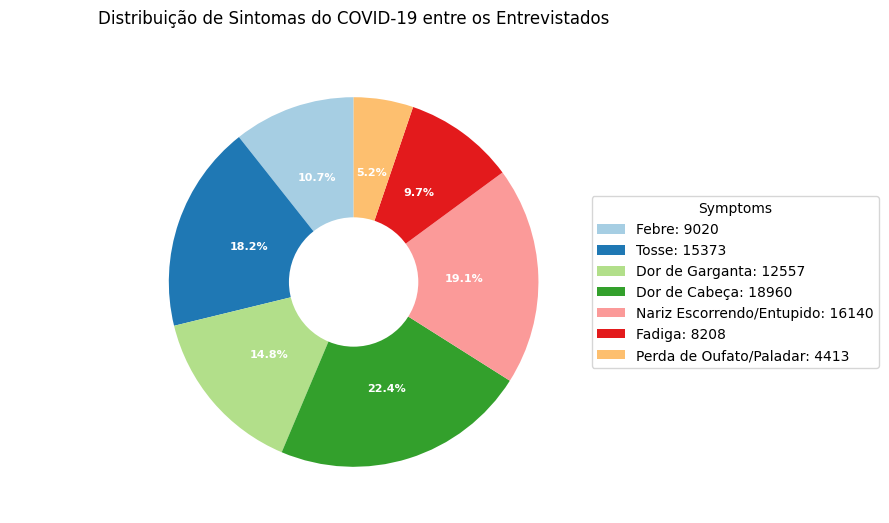

In [261]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  startangle=90, colors=colors,
                                  textprops=dict(color="w"))
plt.gca().add_artist(plt.Circle((0,0),0.35,fc='white'))
colors = plt.cm.Paired(range(len(labels)))
plt.setp(autotexts, size=8, weight="bold")
plt.title('Distribuição de Sintomas do COVID-19 entre os Entrevistados', pad=20)
legend_labels = ['Febre: {0}'.format(sizes[0]),
                 'Tosse: {0}'.format(sizes[1]),
                 'Dor de Garganta: {0}'.format(sizes[2]),
                 'Dor de Cabeça: {0}'.format(sizes[3]),
                 'Nariz Escorrendo/Entupido: {0}'.format(sizes[4]),
                 'Fadiga: {0}'.format(sizes[5]),
                 'Perda de Oufato/Paladar: {0}'.format(sizes[6])]

ax.legend(wedges, legend_labels, title="Symptoms", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [204]:
covid_per_age.show()

+-------------+-----+
|covid_per_age|count|
+-------------+-----+
|      elderly| 7467|
|        adult|24738|
|        young| 8306|
+-------------+-----+



In [209]:
covid_per_age_pd = covid_per_age.toPandas()

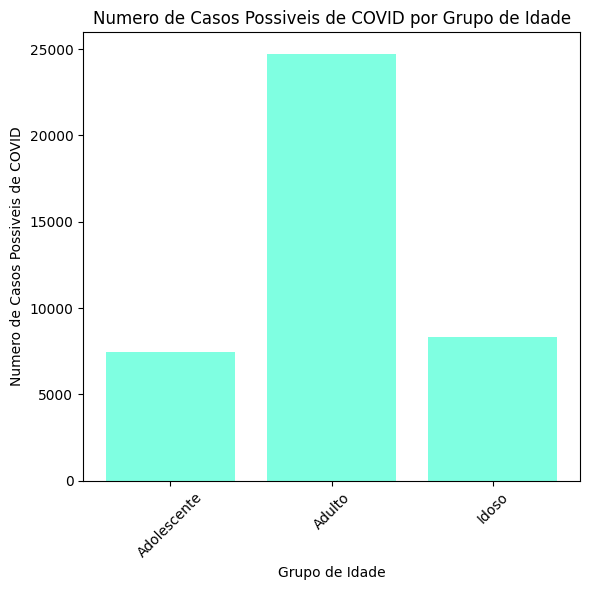

In [238]:
plt.figure(figsize=(6, 6))
age_labels = ['Adolescente', 'Adulto', 'Idoso']
plt.bar(age_labels, covid_per_age_pd['count'], color='#7FFFE1')
plt.xlabel('Grupo de Idade')
plt.ylabel('Numero de Casos Possiveis de COVID')
plt.title('Numero de Casos Possiveis de COVID por Grupo de Idade', )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [227]:
covid_per_sex_pd = covid_per_sex.toPandas

In [228]:
covid_per_sex_pd.head()

,sex,count
0,female,23520
1,male,16991


In [229]:
bar_colors = ['lightpink', 'lightblue']

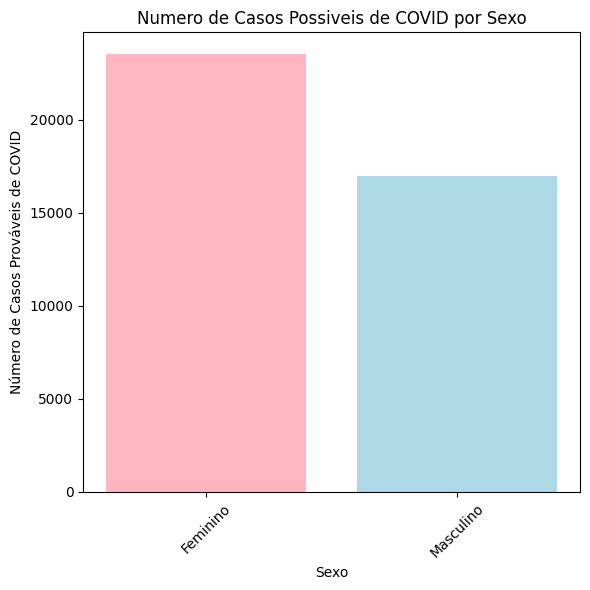

In [230]:
plt.figure(figsize=(6, 6))
sex_labels = ['Feminino', 'Masculino']
plt.bar(sex_labels, covid_per_sex_pd['count'], color=bar_colors)
plt.xlabel('Sexo')
plt.ylabel('Número de Casos Prováveis de COVID')
plt.title('Numero de Casos Possiveis de COVID por Sexo', )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [258]:
healthcare_rentability = to_healthcare.groupBy('income_range').count()
healthcare_rentability = healthcare_rentability.toPandas()

In [274]:
healthcare_rentability['income_range'] = healthcare_rentability['income_range'].replace({
    None: 'Não respondido',
    'not_applicable': 'Não aplicável',
    '101-300': 'F 101-300',
    '301-600': 'F 301-600',
    '601-800': 'F 601-800',
    '801-1,600': 'E 801-1,600',
    '1,601-3,000': 'C 1,601-3,000' ,
    '3,001-10,000': 'B 3,001-10,000',
    '10,001-50,000': 'A 10,001-50,000',
    '50,001-100,000': 'A 50,001-100,000'
})

In [278]:
healthcare_rentability.sort_values(by='income_range', ascending=False, inplace=True)

In [279]:
healthcare_rentability.head()

,income_range,count
0,Não respondido,5951
4,Não aplicável,29
1,F 601-800,153
5,F 301-600,281
7,F 101-300,129


3.3 | Mapa do brasil -> Relacionar estados (uf) com o número de sintomas (2 ou mais sintomas, até 5 no máximo)


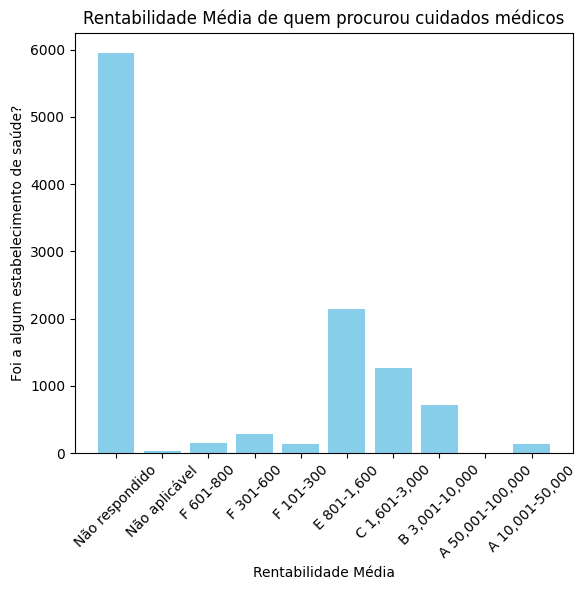

In [290]:
plt.figure(figsize=(6, 6))
plt.bar(healthcare_rentability['income_range'], healthcare_rentability['count'], color='skyblue')
plt.xlabel('Rentabilidade Média')
plt.ylabel('Foi a algum estabelecimento de saúde?')
plt.title('Rentabilidade Média de quem procurou cuidados médicos', )
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [294]:
home_office = df.groupBy('has_worked_remote').count()
home_office = home_office.toPandas()

In [295]:
home_office.head()

,has_worked_remote,count
0,None,1100419
1,no,14757
2,yes,34021


In [301]:
home_office = home_office.dropna()

In [315]:
sizes = home_office['count']

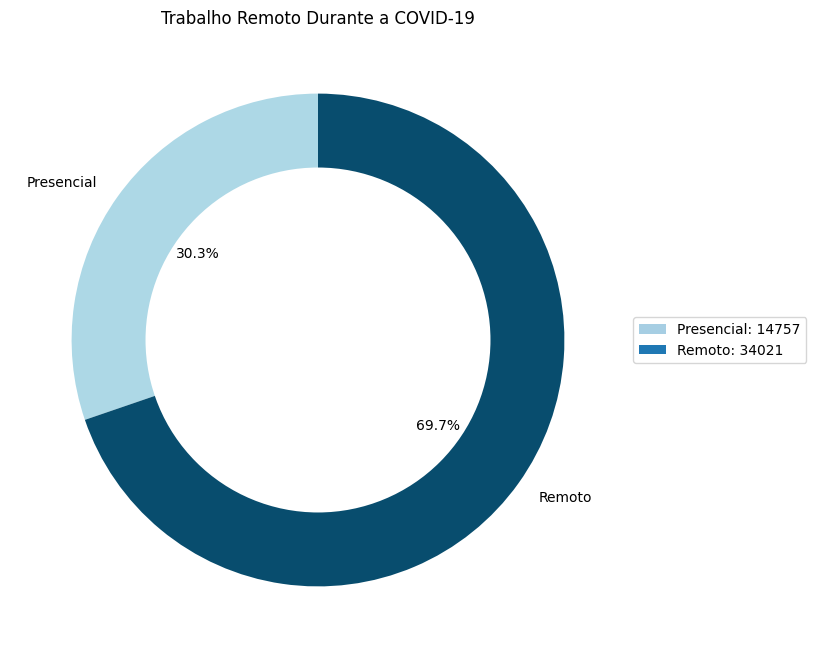

In [330]:
# Plotar o gráfico donut
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
home_label= ['Presencial', 'Remoto']
ax.pie(home_office['count'], labels=home_label, autopct='%1.1f%%', startangle=90, colors = ['lightblue', '#084d6e'])
ax.add_artist(plt.Circle((0,0),0.70,fc='white'))  # Cria o buraco do donut
legend_labels = ['Presencial: {0}'.format(sizes.iloc[0]),
                 'Remoto: {0}'.format(sizes.iloc[1])]
ax.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adicionar um título
plt.title('Trabalho Remoto Durante a COVID-19')
plt.show()

In [362]:
activity_job_covid = probably_covid.groupBy('main_job_activity').count()

In [363]:
activity_job_covid = activity_job_covid.toPandas()

In [364]:
activity_job_covid = activity_job_covid.dropna()

In [365]:
activity_job_covid.head(30)

,main_job_activity,count
0,real_estate_activities,92
1,banks_financial_and_insurance_activities,273
2,repair_of_motor_vehicles_and_motorcycles,298
3,law_firms_engineering_advertising_and_veterina...,574
4,education,1479
5,food_service_bars_restaurants_food_vendors,856
7,accommodation_hotels_inns_etc,77
8,supply_of_electricity_and_gas_water_sewerage_a...,144
9,human_health_and_social_assistance,1339
10,other,906


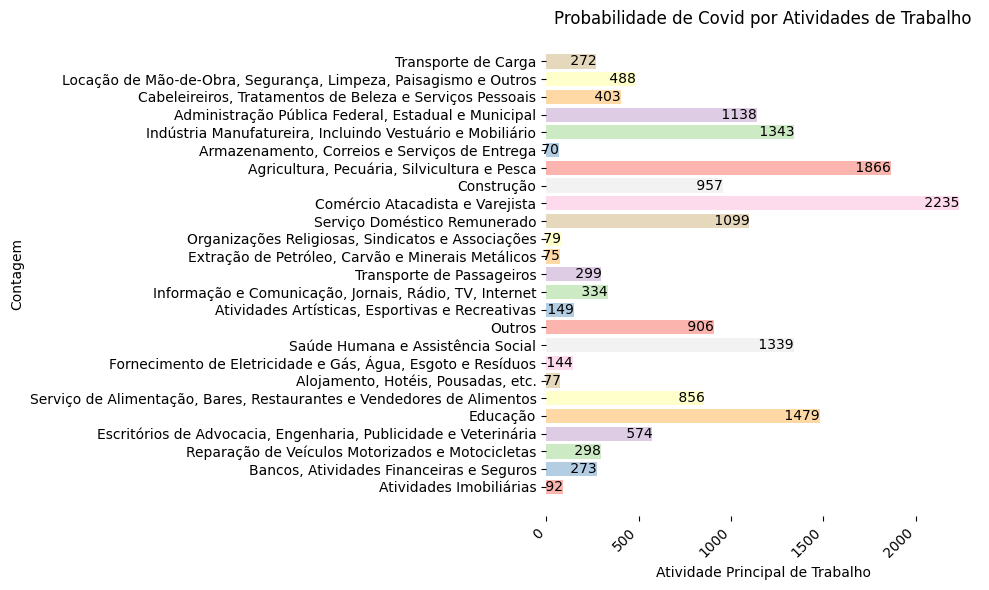

In [380]:
# Agora plotar um gráfico de barras "elegante"
plt.figure(figsize=(10, 6))
pastel_palette = [
    '#fbb4ae',  # Rosa pastel
    '#b3cde3',  # Azul pastel
    '#ccebc5',  # Verde pastel
    '#decbe4',  # Roxo pastel
    '#fed9a6',  # Laranja pastel
    '#ffffcc',  # Amarelo pastel
    '#e5d8bd',  # Bege pastel
    '#fddaec',  # Lilás pastel
    '#f2f2f2'   # Cinza claro pastel
]
activity_label =['Atividades Imobiliárias',
'Bancos, Atividades Financeiras e Seguros',
'Reparação de Veículos Motorizados e Motocicletas',
'Escritórios de Advocacia, Engenharia, Publicidade e Veterinária',
'Educação',
'Serviço de Alimentação, Bares, Restaurantes e Vendedores de Alimentos',
'Alojamento, Hotéis, Pousadas, etc.',
'Fornecimento de Eletricidade e Gás, Água, Esgoto e Resíduos',
'Saúde Humana e Assistência Social',
'Outros',
'Atividades Artísticas, Esportivas e Recreativas',
'Informação e Comunicação, Jornais, Rádio, TV, Internet',
'Transporte de Passageiros',
'Extração de Petróleo, Carvão e Minerais Metálicos',
'Organizações Religiosas, Sindicatos e Associações',
'Serviço Doméstico Remunerado',
'Comércio Atacadista e Varejista',
'Construção',
'Agricultura, Pecuária, Silvicultura e Pesca',
'Armazenamento, Correios e Serviços de Entrega',
'Indústria Manufatureira, Incluindo Vestuário e Mobiliário',
'Administração Pública Federal, Estadual e Municipal',
'Cabeleireiros, Tratamentos de Beleza e Serviços Pessoais',
'Locação de Mão-de-Obra, Segurança, Limpeza, Paisagismo e Outros',
'Transporte de Carga']
bars = plt.barh(activity_label, activity_job_covid['count'], color=pastel_palette)

# Adicionar rótulos individuais em cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f' {int(bar.get_width())}',  # Adiciona espaço para o rótulo não colar na barra
             va='center', ha='right')

# Adicionar título e rótulos aos eixos
plt.title('Probabilidade de Covid por Atividades de Trabalho')
plt.xlabel('Atividade Principal de Trabalho')
plt.ylabel('Contagem')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45, ha='right')

# Remover as bordas do gráfico para um look mais "clean"
plt.box(False)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

## Covid cases per state

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filtered_df = df_pd_state_covid.query('has_covid==True')
filtered_df

In [ ]:
# setting plot size
plt.figure(figsize=(10, 6))

# creating sns barchart
ax = sns.barplot(x=filtered_df['state_code'].value_counts().index,
                 y=filtered_df['state_code'].value_counts().values,
                 palette='rocket')

# Title and label
plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('COVID-19 Cases by State, PNAD Contínua Sep/20 to Nov/20')

#adding data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                size=10,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# setting plot size
plt.figure(figsize=(15, 6))

# creating sns barchart
ax = sns.countplot(data=filtered_df.query('was_hospitalized == "yes" | was_hospitalized=="no"'),
                 x= 'state_code',
                 hue='was_hospitalized',
                 palette='rocket')

# Title and label
plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('Hospitalized COVID-19 Cases by State, PNAD Contínua Sep/20 to Nov/20')

#adding data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                size=10,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
# setting plot size
plt.figure(figsize=(15, 6))

# creating sns barchart
ax = sns.countplot(data=filtered_df.query('was_hospitalized== "yes" & (used_ventilator == "yes" | used_ventilator=="no")'),
                 x= 'state_code',
                 hue='used_ventilator',
                 palette='rocket')

# Title and label
plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('Subject used ventilator Cases by State, PNAD Contínua Sep/20 to Nov/20')

#adding data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                size=10,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show

In [ ]:
# @title
# setting plot size
plt.figure(figsize=(15, 6))

# creating sns barchart
ax = sns.countplot(data=filtered_df.query('went_to_healthcare_facility == "yes" & has_health_insurance != "not_applicable"'),
                 x= 'state_code',
                 hue='has_health_insurance',
                 orient = 'h',
                 palette='rocket')

# Title and label
plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('Subject sought healthcare facility, has_health_insurance breakdown, PNAD Contínua Sep/20 to Nov/20')

#adding data label
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', rotation = 45,
                size=8,
                xytext = (0, 9),
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show